In [2]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [14]:
#file_true = uproot.open("/home/viola/fast_vertexing_variables/inference/example/example.root" )["DecayTree"]
#file_sur = uproot.open("/home/viola/fast_vertexing_variables/inference/example/example_reco.root" )["DecayTree"]

file_true = uproot.open("~/fast_vertexing_variables/datasets/combinatorial_select_Kuu.root" )["DecayTree"]
file_sur = uproot.open("~/fast_vertexing_variables/datasets/combinatorial_select_Kuu_inferable_reco_D.root" )["DecayTree"]


In [15]:
branches_true = file_true.keys()
true_data = file_true.arrays(library="pd")

print(branches_true)
print(len(branches_true))

mother_cols = true_data.columns[true_data.columns.str.contains('IPCHI2_OWNPV')]
true_data.loc[:, mother_cols]

['MOTHER_ENDVERTEX_X', 'MOTHER_ENDVERTEX_Y', 'MOTHER_ENDVERTEX_Z', 'MOTHER_ENDVERTEX_XERR', 'MOTHER_ENDVERTEX_YERR', 'MOTHER_ENDVERTEX_ZERR', 'MOTHER_ENDVERTEX_CHI2', 'MOTHER_ENDVERTEX_NDOF', 'MOTHER_ENDVERTEX_COV_', 'MOTHER_OWNPV_X', 'MOTHER_OWNPV_Y', 'MOTHER_OWNPV_Z', 'MOTHER_OWNPV_XERR', 'MOTHER_OWNPV_YERR', 'MOTHER_OWNPV_ZERR', 'MOTHER_OWNPV_COV_', 'MOTHER_IPCHI2_OWNPV', 'MOTHER_FDCHI2_OWNPV', 'MOTHER_DIRA_OWNPV', 'MOTHER_PX', 'MOTHER_PY', 'MOTHER_PZ', 'MOTHER_BKGCAT', 'MOTHER_TRUEID', 'MOTHER_nNegative_stable', 'MOTHER_nPositive_stable', 'MOTHER_MC_MOTHER_ID', 'MOTHER_MC_GD_MOTHER_ID', 'MOTHER_MC_GD_GD_MOTHER_ID', 'MOTHER_TRUEP_X', 'MOTHER_TRUEP_Y', 'MOTHER_TRUEP_Z', 'MOTHER_TRUEORIGINVERTEX_X', 'MOTHER_TRUEORIGINVERTEX_Y', 'MOTHER_TRUEORIGINVERTEX_Z', 'MOTHER_TRUEENDVERTEX_X', 'MOTHER_TRUEENDVERTEX_Y', 'MOTHER_TRUEENDVERTEX_Z', 'MOTHER_cpt_0.70', 'MOTHER_cp_0.70', 'MOTHER_cmult_0.70', 'MOTHER_SmallestDeltaChi2OneTrack', 'MOTHER_SmallestDeltaChi2TwoTracks', 'MOTHER_VTXISOBDTHARDFI

,MOTHER_IPCHI2_OWNPV,INTERMEDIATE_IPCHI2_OWNPV,DAUGHTER3_IPCHI2_OWNPV,DAUGHTER2_IPCHI2_OWNPV,DAUGHTER1_IPCHI2_OWNPV
0,17.769213,12.338416,150.776922,208.104888,0.068829
1,121.616229,144.314315,51.723429,208.104888,0.068829
2,202.985826,181.286483,150.776922,159.648642,0.068829
3,29.180562,26.390761,51.723429,159.648642,0.068829
4,10559.479345,12968.471171,13827.926194,879.711067,14.207250
...,...,...,...,...,...
140301,591.245403,2167.484707,6508.869675,0.231141,93.877916
140302,118.417098,354.149212,0.628278,8.217182,0.014225
140303,1334.585190,354.149212,0.628278,8.217182,2.452192
140304,475.726233,354.149212,0.628278,8.217182,1.350894


In [16]:
branches_sur = file_sur.keys()
sur_data = file_sur.arrays(library="pd")

print(branches_sur)
print(len(branches_sur))

#mother_cols = sur_data.columns[sur_data.columns.str.contains('IPCHI2_OWNPV')]
#sur_data.loc[:, mother_cols]

sur_data.iloc[:,-20:]

['MOTHER_PX', 'MOTHER_PX_TRUE', 'MOTHER_origX_TRUE', 'MOTHER_origX', 'MOTHER_vtxX', 'MOTHER_vtxX_TRUE', 'DAUGHTER1_PX', 'DAUGHTER1_PX_TRUE', 'DAUGHTER1_origX_TRUE', 'DAUGHTER2_PX', 'DAUGHTER2_PX_TRUE', 'DAUGHTER2_origX_TRUE', 'DAUGHTER3_PX', 'DAUGHTER3_PX_TRUE', 'DAUGHTER3_origX_TRUE', 'MOTHER_PY', 'MOTHER_PY_TRUE', 'MOTHER_origY_TRUE', 'MOTHER_origY', 'MOTHER_vtxY', 'MOTHER_vtxY_TRUE', 'DAUGHTER1_PY', 'DAUGHTER1_PY_TRUE', 'DAUGHTER1_origY_TRUE', 'DAUGHTER2_PY', 'DAUGHTER2_PY_TRUE', 'DAUGHTER2_origY_TRUE', 'DAUGHTER3_PY', 'DAUGHTER3_PY_TRUE', 'DAUGHTER3_origY_TRUE', 'MOTHER_PZ', 'MOTHER_PZ_TRUE', 'MOTHER_origZ_TRUE', 'MOTHER_origZ', 'MOTHER_vtxZ', 'MOTHER_vtxZ_TRUE', 'DAUGHTER1_PZ', 'DAUGHTER1_PZ_TRUE', 'DAUGHTER1_origZ_TRUE', 'DAUGHTER2_PZ', 'DAUGHTER2_PZ_TRUE', 'DAUGHTER2_origZ_TRUE', 'DAUGHTER3_PZ', 'DAUGHTER3_PZ_TRUE', 'DAUGHTER3_origZ_TRUE', 'MOTHER_P_TRUE', 'MOTHER_PT_TRUE', 'DAUGHTER1_PT', 'DAUGHTER1_P', 'DAUGHTER2_PT', 'DAUGHTER2_P', 'DAUGHTER3_PT', 'DAUGHTER3_P', 'MOTHER_ENDVE

,MOTHER_ENDVERTEX_CHI2,MOTHER_IPCHI2_OWNPV,MOTHER_FDCHI2_OWNPV,MOTHER_DIRA_OWNPV,DAUGHTER1_IPCHI2_OWNPV,DAUGHTER1_TRACK_CHI2NDOF,DAUGHTER3_IPCHI2_OWNPV,DAUGHTER3_TRACK_CHI2NDOF,DAUGHTER2_IPCHI2_OWNPV,DAUGHTER2_TRACK_CHI2NDOF,INTERMEDIATE_FDCHI2_OWNPV,INTERMEDIATE_IPCHI2_OWNPV,INTERMEDIATE_ENDVERTEX_CHI2,INTERMEDIATE_DIRA_OWNPV,MOTHER_VTXISOBDTHARDFIRSTVALUE,MOTHER_VTXISOBDTHARDSECONDVALUE,MOTHER_VTXISOBDTHARDTHIRDVALUE,DAUGHTER2_TRACK_GhostProb,DAUGHTER3_TRACK_GhostProb,DAUGHTER1_TRACK_GhostProb
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = true_data[['MOTHER_IPCHI2_OWNPV']].copy()
df['MOTHER_IPCHI2_OWNPV_SUR'] = sur_data['MOTHER_IPCHI2_OWNPV']

#df['label'] = np.where(df['MOTHER_IPCHI2_OWNPV_SUR'] == df['MOTHER_IPCHI2_OWNPV'], 1, 0)

tolerance = 0.01  

df['label'] = np.where(np.abs(df['MOTHER_IPCHI2_OWNPV_SUR'] - df['MOTHER_IPCHI2_OWNPV']) < tolerance * df['MOTHER_IPCHI2_OWNPV_SUR'], 1, 0)

unique, counts = np.unique(df['label'], return_counts=True)
print(f"Label distribution: {dict(zip(unique, counts))}")

Label distribution: {0: 140269, 1: 37}


In [22]:
X = df[['MOTHER_IPCHI2_OWNPV_SUR', 'MOTHER_IPCHI2_OWNPV']].values  # input features
y = df['label'].values  # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#BDT parameters 
params = {
    'max_depth': 3,  #depth of each tree
    'eta': 0.1,      #learning rate
    'objective': 'binary:logistic',  #binary classification
    'eval_metric': 'auc'
}

#train 
bst = xgb.train(params, dtrain, num_boost_round=100)

#predict on test data
y_pred = bst.predict(dtest)

#evaluate performance
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC score: {auc_score}")


AUC score: 0.977563776116464


ValueError: autodetected range of [nan, nan] is not finite

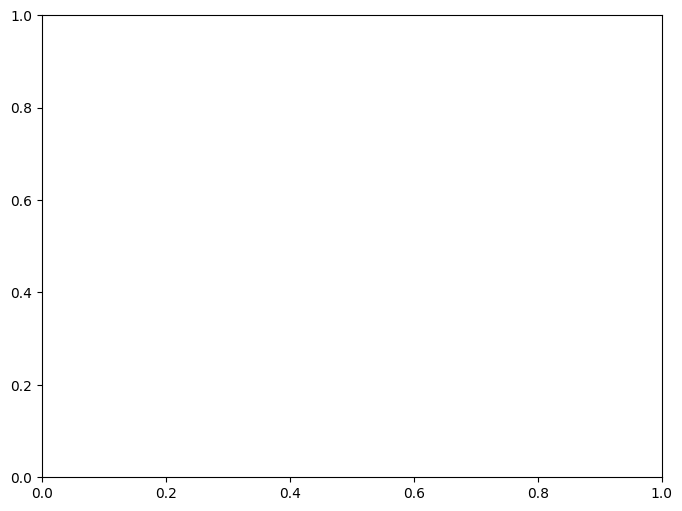

In [24]:
#Heatmap

df_test = pd.DataFrame(X_test, columns=['MOTHER_IPCHI2_OWNPV_SUR', 'MOTHER_IPCHI2_OWNPV'])
df_test['BDT_output'] = y_pred

plt.figure(figsize=(8, 6))
plt.hist2d(df_test['MOTHER_IPCHI2_OWNPV_SUR'], df_test['MOTHER_IPCHI2_OWNPV'], bins=50, weights=df_test['BDT_output'], cmap='Blues')
plt.show()

